In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import keras
from keras.preprocessing.text import Tokenizer
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional,InputLayer
from sklearn.model_selection import train_test_split

In [2]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Pac

True

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
data_path = "/content/drive/MyDrive/CS6890Project/data/training.1600000.processed.noemoticon.csv"

In [5]:
file = open(data_path, "r")
for line in file:
    print(line)
    break
file.close()

"0","1467810369","Mon Apr 06 22:19:45 PDT 2009","NO_QUERY","_TheSpecialOne_","@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D"



In [6]:
data = pd.read_csv(data_path, header=None, encoding = "ISO-8859-1")
data.columns = ["target", "id", "date", "flag", "user", "text"]

In [7]:
data.head()

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [8]:
data.dtypes

target     int64
id         int64
date      object
flag      object
user      object
text      object
dtype: object

In [9]:
X=np.array(data['text'])
Y=np.array(data['target'])

# Set Y=1 for Positive Tweets
Y[Y==4]=1

In [10]:
index = 123  # index in range [0,1599999]

print(X[index])

I am in pain. My back and sides hurt. Not to mention crying is made of fail. 


#With Unprocessed Data

In [11]:
tokenizer = Tokenizer(filters='@')
tokenizer.fit_on_texts(X)

print('No. of distinct tokens = '+str(len(tokenizer.word_index)))

No. of distinct tokens = 1185412


In [12]:
max_vocab=50000

In [13]:
tokenizer = Tokenizer(num_words=max_vocab,filters='@')
tokenizer.fit_on_texts(X)

In [14]:
X_vectorized=tokenizer.texts_to_sequences(X)

In [15]:
sum=0
for sentence in X_vectorized:
  sum+=len(sentence)

print('Average length of tweets = '+str(sum/len(X_vectorized)))

Average length of tweets = 11.967963125


In [16]:
max_length=20
X_pad = keras.preprocessing.sequence.pad_sequences(X_vectorized,max_length,padding='post',
                                                   truncating='post')

print(X_pad.shape)

(1600000, 20)


In [17]:
def tokenize(X):
  """
  Tokenize the data using nltk
  """

  treebank = nltk.tokenize.TreebankWordTokenizer()
  X_tokenized=[treebank.tokenize(sentence) for sentence in X]  
  return X_tokenized

In [18]:
index  = 123  # index in range [0,1599999]
X_tokenized = tokenize(X)

print('\nOriginal :')
print(X[index])
print('\nTokenized :')
print(X_tokenized[index])
print('\nVectorized :')
print(X_vectorized[index])
print('\nPadded :')
print(X_pad[index])




Original :
I am in pain. My back and sides hurt. Not to mention crying is made of fail. 

Tokenized :
['I', 'am', 'in', 'pain.', 'My', 'back', 'and', 'sides', 'hurt.', 'Not', 'to', 'mention', 'crying', 'is', 'made', 'of', 'fail', '.']

Vectorized :
[1, 57, 10, 2588, 5, 48, 6, 8826, 2898, 25, 2, 1418, 1086, 8, 187, 12, 2288]

Padded :
[   1   57   10 2588    5   48    6 8826 2898   25    2 1418 1086    8
  187   12 2288    0    0    0]


In [19]:
np.random.seed(123)

model_1 = keras.models.Sequential(name='model1')

model_1.add(InputLayer(input_shape=(20,),name = 'Integer_Encoding'))
model_1.add(Embedding(max_vocab, 100,input_length=20,mask_zero=True,
                      name='100D_Encoding',trainable=False))
model_1.add(Bidirectional(LSTM(64,name='LSTM'),name='Bidirectional_RNN'))
model_1.add(Dropout(0.5,name='Regularizer'))
model_1.add(Dense(1, activation='sigmoid',name='Sigmoid_Classifier'))

In [20]:
import tensorflow as tf 
from tensorflow.keras.utils import plot_model

model_1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='binary_crossentropy',
                metrics=['accuracy'])
model_1

In [21]:
model_1.summary()

Model: "model1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 100D_Encoding (Embedding)   (None, 20, 100)           5000000   
                                                                 
 Bidirectional_RNN (Bidirect  (None, 128)              84480     
 ional)                                                          
                                                                 
 Regularizer (Dropout)       (None, 128)               0         
                                                                 
 Sigmoid_Classifier (Dense)  (None, 1)                 129       
                                                                 
Total params: 5,084,609
Trainable params: 84,609
Non-trainable params: 5,000,000
_________________________________________________________________


In [22]:
np.random.seed(123)

X_train, X_test, Y_train, Y_test = train_test_split (X_pad,Y.reshape(Y.shape[0],1),test_size=0.30)

print(len(X_train))
print(len(X_test))
print(len(Y_train))
print(len(Y_test))

1120000
480000
1120000
480000


In [23]:
history_model_1 = model_1.fit(X_train,Y_train,batch_size=1024,epochs=15,validation_split=0.30)

Epoch 1/15
766/766 [==============================] - 345s 436ms/step - loss: 0.6460 - accuracy: 0.6269 - val_loss: 0.6308 - val_accuracy: 0.6423
Epoch 2/15
766/766 [==============================] - 330s 431ms/step - loss: 0.6189 - accuracy: 0.6549 - val_loss: 0.6001 - val_accuracy: 0.6715
Epoch 3/15
766/766 [==============================] - 329s 430ms/step - loss: 0.5866 - accuracy: 0.6859 - val_loss: 0.5714 - val_accuracy: 0.6988
Epoch 4/15
766/766 [==============================] - 330s 431ms/step - loss: 0.5615 - accuracy: 0.7076 - val_loss: 0.5532 - val_accuracy: 0.7135
Epoch 5/15
766/766 [==============================] - 333s 435ms/step - loss: 0.5457 - accuracy: 0.7203 - val_loss: 0.5354 - val_accuracy: 0.7275
Epoch 6/15
766/766 [==============================] - 331s 433ms/step - loss: 0.5346 - accuracy: 0.7297 - val_loss: 0.5282 - val_accuracy: 0.7332
Epoch 7/15
766/766 [==============================] - 329s 429ms/step - loss: 0.5258 - accuracy: 0.7352 - val_loss: 0.5184 -

In [24]:
model_1.evaluate(X_test,Y_test)

15000/15000 [==============================] - 161s 11ms/step - loss: 0.4954 - accuracy: 0.7571


[0.4954434037208557, 0.7570854425430298]

#Word Embedding

In [25]:
def tokenize(X):
  """
  Tokenize the data using nltk
  """

  treebank = nltk.tokenize.TreebankWordTokenizer()
  X_tokenized=[treebank.tokenize(sentence) for sentence in X]  
  return X_tokenized


def remove_stopwords(X):
  """
  Remove Stopwords using nltk
  """

  stopwords=nltk.corpus.stopwords.words('english') + ['@']
  X_without_stopwords = []

  for sentence in X:

    temp = [word for word in sentence if not word in stopwords]
    X_without_stopwords.append(temp) 

  return X_without_stopwords


def stem(X,type='porter'):
  """
  Perform Stemming using nltk
  type = 'Porter','Snowball','Lancaster'
  """
  
  if type == 'porter':
    stemmer= nltk.stem.PorterStemmer()
  elif type == 'snowball':
    stemmer = nltk.stem.SnowballStemmer()
  elif type == 'lancaster':
    stemmer = nltk.stem.LancasterStemmer()    

  
  X_stemmed = []

  for sentence in X:

    temp = [stemmer.stem(word) for word in sentence]
    X_stemmed.append(temp)

  return X_stemmed 



def get_wordnet_pos(treebank_tag):
        """
        return WORDNET POS compliance to WORDENT lemmatization (a,n,r,v) 
        """
        if treebank_tag.startswith('J'):
            return 'a'
        elif treebank_tag.startswith('V'):
            return 'v'
        elif treebank_tag.startswith('N'):
            return 'n'
        elif treebank_tag.startswith('R'):
            return 'r'
        else:
            return 'n'


def lemmatize(X):
  """
  Lemmatize words using corresponding POS tag
  """

  lemmatizer = nltk.stem.WordNetLemmatizer()
  
  X_pos = []
  X_lemmatized = []

  for sentence in X :

    temp = nltk.pos_tag(sentence)
    X_pos.append(temp)  

  for sentence in X_pos :

    temp = [ lemmatizer.lemmatize(word[0],pos=get_wordnet_pos(word[1])) for word in sentence]
    X_lemmatized.append(temp)  

  return X_lemmatized    

In [26]:
X_tokenized = tokenize (X)

X_without_stopwords = remove_stopwords ( X_tokenized )

X_lemmatized = lemmatize ( X_without_stopwords )

X_clean = []

for sentence in X_lemmatized:

  temp = " ".join(sentence)
  X_clean.append(temp)

In [27]:
tokenizer = Tokenizer(filters='@')
tokenizer.fit_on_texts(X_clean)

print('No. of distinct tokens = '+str(len(tokenizer.word_index)))

No. of distinct tokens = 837032


In [28]:
max_vocab=50000

In [29]:
tokenizer = Tokenizer(num_words=max_vocab,filters='@')
tokenizer.fit_on_texts(X_clean)

In [30]:
# Vectorize input text using Vocabulary

X_clean_vectorized=tokenizer.texts_to_sequences(X_clean)

In [31]:
# Count average length of tweets

length=[]
for sentence in X_clean_vectorized:
  length.append(len(sentence))
  
print('Average length of tweets = '+str(np.mean(length)))

Average length of tweets = 10.064181875


In [32]:
# Define Maximum input length of the Model

max_length=20

In [33]:
X_clean_pad = keras.preprocessing.sequence.pad_sequences(X_clean_vectorized,max_length,padding='post',
                                                         truncating='post')

print(X_clean_pad.shape)

(1600000, 20)


In [34]:
index  = 123  # index in range [0,1599999]

print('\nOriginal :')
print(X[index])
print('\nTokenized :')
print(X_tokenized[index])
print('\nStopwords removed :')
print(X_without_stopwords[index])
print('\nPOS tagged :')
print(nltk.pos_tag(X_without_stopwords[index]))
print('\nLemmatized :')
print(X_lemmatized[index])
print('\nClean :')
print(X_clean[index])
print('\nVectorized :')
print(X_clean_vectorized[index])
print('\nPadded :')
print(X_clean_pad[index])


Original :
I am in pain. My back and sides hurt. Not to mention crying is made of fail. 

Tokenized :
['I', 'am', 'in', 'pain.', 'My', 'back', 'and', 'sides', 'hurt.', 'Not', 'to', 'mention', 'crying', 'is', 'made', 'of', 'fail', '.']

Stopwords removed :
['I', 'pain.', 'My', 'back', 'sides', 'hurt.', 'Not', 'mention', 'crying', 'made', 'fail', '.']

POS tagged :
[('I', 'PRP'), ('pain.', 'VBP'), ('My', 'PRP$'), ('back', 'NN'), ('sides', 'NNS'), ('hurt.', 'VBP'), ('Not', 'RB'), ('mention', 'NN'), ('crying', 'VBG'), ('made', 'VBN'), ('fail', 'NN'), ('.', '.')]

Lemmatized :
['I', 'pain.', 'My', 'back', 'side', 'hurt.', 'Not', 'mention', 'cry', 'make', 'fail', '.']

Clean :
I pain. My back side hurt. Not mention cry make fail .

Vectorized :
[2, 3430, 62, 30, 591, 4231, 146, 831, 308, 33, 426, 4]

Padded :
[   2 3430   62   30  591 4231  146  831  308   33  426    4    0    0
    0    0    0    0    0    0]


**Using pre-trained Word Embeddings (GloVe)**

In [35]:
embedding_path = "/content/drive/MyDrive/CS6890Project/data/glove.6B.100d.txt"

In [36]:
embeddings_index = dict()
f = open(embedding_path)
for line in f:
	values = line.split()
	word = values[0]
	coefs = np.asarray(values[1:], dtype='float32')
	embeddings_index[word] = coefs
f.close()

In [37]:
embedding_matrix = np.zeros((max_vocab, 100))
for i in range(1,max_vocab):
	embedding_vector = embeddings_index.get(tokenizer.index_word[i])
	if embedding_vector is not None:
		embedding_matrix[i] = embedding_vector

In [38]:
import tensorflow as tf 

In [39]:
np.random.seed(123)

model_2 = keras.models.Sequential(name='model2')

model_2.add(InputLayer(input_shape=(20,),name='Integer_Encoding_after_Preprocessing'))
model_2.add(Embedding(max_vocab, 100, weights=[embedding_matrix], input_length=max_length,mask_zero=True,
                      name='Pretrained_GloVe_100D', trainable=False))
model_2.add(Bidirectional(LSTM(64,name='LSTM'),name='Bidirectional_RNN'))
model_2.add(Dropout(0.5,name='Regularizer'))
model_2.add(Dense(1, activation='sigmoid',name='Sigmoid_Classifier'))

In [40]:
model_2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='binary_crossentropy',
                metrics=['accuracy'])

In [41]:
model_2.summary()

Model: "model2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Pretrained_GloVe_100D (Embe  (None, 20, 100)          5000000   
 dding)                                                          
                                                                 
 Bidirectional_RNN (Bidirect  (None, 128)              84480     
 ional)                                                          
                                                                 
 Regularizer (Dropout)       (None, 128)               0         
                                                                 
 Sigmoid_Classifier (Dense)  (None, 1)                 129       
                                                                 
Total params: 5,084,609
Trainable params: 84,609
Non-trainable params: 5,000,000
_________________________________________________________________


In [42]:
np.random.seed(123)

X_train, X_test, Y_train, Y_test = train_test_split (X_clean_pad,Y.reshape(Y.shape[0],1),test_size=0.30)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1120000, 20)
(480000, 20)
(1120000, 1)
(480000, 1)


In [43]:
# Train the model

history_model_2 = model_2.fit(X_train,Y_train,batch_size=1024,epochs=15,validation_split=0.30)

Epoch 1/15
766/766 [==============================] - 342s 435ms/step - loss: 0.5394 - accuracy: 0.7245 - val_loss: 0.5000 - val_accuracy: 0.7545
Epoch 2/15
766/766 [==============================] - 332s 434ms/step - loss: 0.4938 - accuracy: 0.7585 - val_loss: 0.4805 - val_accuracy: 0.7671
Epoch 3/15
766/766 [==============================] - 333s 435ms/step - loss: 0.4776 - accuracy: 0.7694 - val_loss: 0.4690 - val_accuracy: 0.7739
Epoch 4/15
766/766 [==============================] - 329s 430ms/step - loss: 0.4679 - accuracy: 0.7754 - val_loss: 0.4707 - val_accuracy: 0.7729
Epoch 5/15
766/766 [==============================] - 330s 431ms/step - loss: 0.4608 - accuracy: 0.7805 - val_loss: 0.4590 - val_accuracy: 0.7809
Epoch 6/15
766/766 [==============================] - 328s 429ms/step - loss: 0.4562 - accuracy: 0.7829 - val_loss: 0.4585 - val_accuracy: 0.7799
Epoch 7/15
766/766 [==============================] - 327s 427ms/step - loss: 0.4508 - accuracy: 0.7864 - val_loss: 0.4560 -

In [44]:
model_2.evaluate(X_test,Y_test)

15000/15000 [==============================] - 165s 11ms/step - loss: 0.4467 - accuracy: 0.7892


[0.44669944047927856, 0.7892208099365234]

In [45]:
n_epochs=len(history_model_1.history['loss'])
e = list(range(1,n_epochs+1))

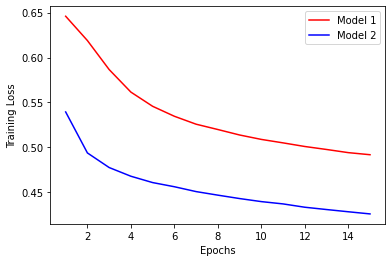

In [51]:
# Training Loss

plt.plot(e,history_model_1.history['loss'],'r',label='Model 1')
plt.plot(e,history_model_2.history['loss'],'b',label='Model 2')
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.legend()
plt.show()

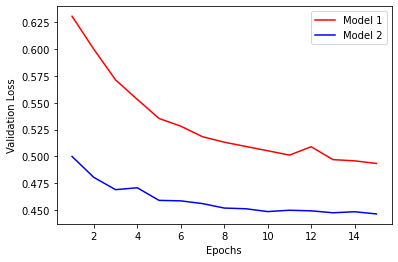

In [47]:
# Validation Loss

plt.plot(e,history_model_1.history['val_loss'],'r',label='Model 1')
plt.plot(e,history_model_2.history['val_loss'],'b',label='Model 2')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()

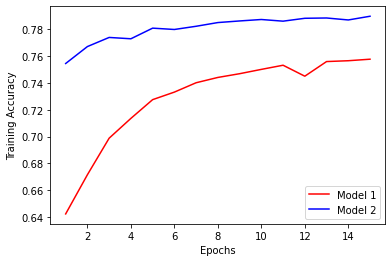

In [49]:
# Training Accuracy

plt.plot(e,history_model_1.history['val_accuracy'],'r',label='Model 1')
plt.plot(e,history_model_2.history['val_accuracy'],'b',label='Model 2')
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.legend()
plt.show()

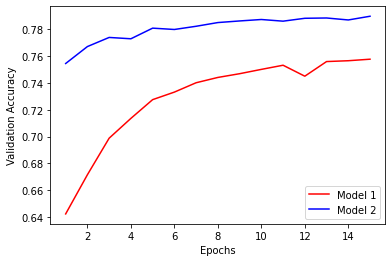

In [50]:
# Validation Accuracy

plt.plot(e,history_model_1.history['val_accuracy'],'r',label='Model 1')
plt.plot(e,history_model_2.history['val_accuracy'],'b',label='Model 2')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()